In [2]:
import numpy as np
from numpy.linalg import inv, det


import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from anneling_one import Annealing1

import random
random.seed(99)

In [3]:
def xyz_gen(gen, function):
    
    x=[x[0] for x in gen]
    y=[x[1] for x in gen]
    z=[function([x[i],y[i]]) for i in range(len(gen))]
    return x,y,z

In [4]:
N1 = 100
N2 = 100
Ef = 0
EfI=  Ef*np.array([[1,0],[0,1]])
piI = 2*np.pi* np.array([[1,0],[0,1]])

A = np.array([ [1/2, np.sqrt(3)/2],
               [1/2, -np.sqrt(3)/2]]).T
invA= inv(A)
B = 2*np.pi*invA.T

def H_mat(n1,n2):
    
    k = (n1/N1)*B[:,0]+(n2/N2)*B[:,1]
    
    ka1=np.dot(A[:,0],k) # ka1,k2 = np.dot(A,k)
    ka2=np.dot(A[:,1],k)
    
    f = np.exp(1j*ka1)+ np.exp(1j*ka2)+1 
    
    f_conj= np.conj(f)
    
    H = np.array([[0, f],[f_conj,0]])
    
    return H

def det_sq(n1,n2):
    
    det_H= det( H_mat(n1,n2)-EfI )

    return np.real(det_H)*np.real(det_H)

def bands_F(n1,n2):
    
    bands= np.linalg.eigvals( H_mat(n1,n2) )

    return np.real(bands)


(2, 100, 100)


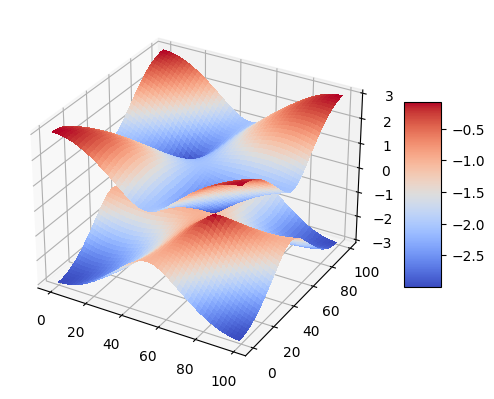

In [5]:
X1 =  np.arange(0, N1, 1)
X2 =  np.arange(0, N2, 1)

              
bands= np.transpose([[ bands_F(x1,x2) for x2 in X2] for x1 in X1], axes=[2,1,0])
print(bands.shape)  

X1, X2 = np.meshgrid(X1, X2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

for band in bands:

    surf = ax.plot_surface(X1, X2, band, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

zsort: [1.77346121e-06 1.77346121e-06 1.77346121e-06 1.77346121e-06
 1.77346121e-06]


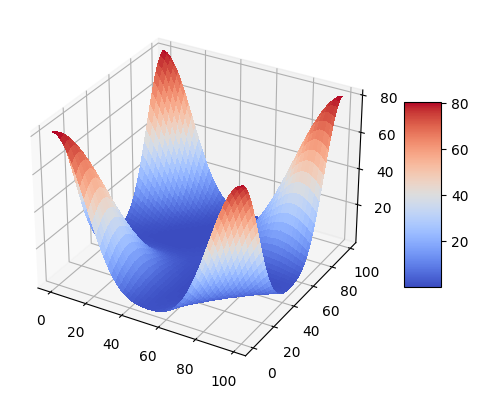

In [6]:
def fit_function(x):

    return det_sq(x[0],x[1])

X1 =  np.arange(0, N1, 1)
X2 =  np.arange(0, N2, 1)

              
Z= np.array([fit_function([x1,x2]) for x2 in X2 for x1 in X1])
print("zsort:",np.sort(Z)[:5]) 

Z= np.array([[fit_function([x1,x2]) for x2 in X2] for x1 in X1])

X1, X2 = np.meshgrid(X1, X2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [8]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'initialTemp': 1, 
    'finalTemp': 0.0003,

    'beta': 10,
    'bounds': [[1,N1],[1,N2]],

    'nr_neighbours': 5,
    'step_size': 4,
    'gaussian_sd':5
    
}

#
input_size = 2 # since our function has one variable this is a trivial scenario.
start_point = [20, 30]

# Experiment
experiment = Annealing1(fit_function,start_point, model_par)

In [9]:
epochs= 5
history_book = experiment.evolve( epochs, prints_p=5)

temp:1|epoch:0|change:0.6835763614663222|value:22.00981428271559
temp:0.09090909090909091|epoch:0|change:-2.796285980454102|value:1.505640940615283
temp:0.047619047619047616|epoch:0|change:0.39826744989165697|value:0.4391469661097849
temp:0.03225806451612903|epoch:0|change:-0.2135921143362678|value:0.22555485177351708
temp:0.024390243902439025|epoch:0|change:0.32854268587638513|value:0.042599105171567585
temp:0.0196078431372549|epoch:0|change:0.006798518452353977|value:0.04939762362392156
temp:0.01639344262295082|epoch:0|change:0.7474890851194648|value:0.024907774468726496
temp:0.014084507042253523|epoch:0|change:1.5510609657773022|value:0.03412568358189398
temp:0.01234567901234568|epoch:0|change:0.1351235390521469|value:0.04939762362392156
temp:0.010989010989010988|epoch:0|change:0.23770464989205045|value:0.04939762362392156
temp:0.0099009900990099|epoch:0|change:0.7845527012154453|value:0.011107334866675901
temp:0.009009009009009007|epoch:0|change:0.39790955297343295|value:0.01110733

temp:0.0010515247108307047|epoch:0|change:0.16555716513771468|value:0.0004855348014807232
temp:0.0010405827263267433|epoch:0|change:0.22506931697203636|value:0.0004855348014807232
temp:0.0010298661174047378|epoch:0|change:0.31636865041245504|value:2.6360389098465885e-05
temp:0.0010193679918450564|epoch:0|change:0.020746177964978425|value:0.0012577266318119635
temp:0.0010090817356205855|epoch:0|change:0.0025704702018708465|value:0.0012577266318119635
temp:0.0009990009990009992|epoch:0|change:0.0|value:0.0012577266318119635
temp:0.0009891196834817015|epoch:0|change:-0.0006127918121242825|value:0.0006449348196876809
temp:0.0009794319294809013|epoch:0|change:0.11997325092864931|value:0.0006449348196876809
temp:0.0009699321047526674|epoch:0|change:0.25023382869792765|value:0.0006449348196876809
temp:0.0009606147934678195|epoch:0|change:0.03774378130564804|value:0.0006449348196876809
temp:0.0009514747859181732|epoch:0|change:0.10060852722561604|value:0.0006449348196876809
temp:0.000942507068

temp:0.0005288207297726075|epoch:0|change:0.06880748310138322|value:0.0006449348196876809
temp:0.0005260389268805896|epoch:0|change:-0.0005572584873797374|value:8.76763323079435e-05
temp:0.0005232862375719523|epoch:0|change:0.06775750062764152|value:8.76763323079435e-05
temp:0.0005205622071837589|epoch:0|change:0.010872407776390534|value:8.76763323079435e-05
temp:0.0005178663904712589|epoch:0|change:0.010872407776390485|value:8.76763323079435e-05
temp:0.0005151983513652761|epoch:0|change:0.0005572584873797377|value:8.76763323079435e-05
temp:0.0005125576627370583|epoch:0|change:0.0|value:8.76763323079435e-05
temp:0.0005099439061703217|epoch:0|change:0.10335009406706448|value:0.0006449348196876809
temp:0.0005073566717402339|epoch:0|change:3.483055149265154|value:0.0004855348014807232
temp:0.0005047955577990918|epoch:0|change:0.04211357037008691|value:0.0004855348014807232
temp:0.0005022601707684584|epoch:0|change:0.06433054449586048|value:0.0004855348014807232
temp:0.0004997501249375315|

temp:0.00035075412136092613|epoch:0|change:0.006465592245743948|value:2.636038909846682e-05
temp:0.0003495281370150299|epoch:0|change:0.011080974477577435|value:2.636038909846682e-05
temp:0.0003483106931382795|epoch:0|change:0.06478971890824294|value:2.636038909846682e-05
temp:0.0003471017007983341|epoch:0|change:0.006316346587261062|value:0.00027313512113895236
temp:0.00034590107229332434|epoch:0|change:0.05387572243532773|value:0.00027313512113895236
temp:0.00034470872113064483|epoch:0|change:0.01083419974553695|value:0.0002731351211389505
temp:0.00034352456200618367|epoch:0|change:0.06757204183881008|value:0.0002731351211389505
temp:0.0003423485107839783|epoch:0|change:-0.00027136165993291774|value:1.773461206032805e-06
temp:0.00034118048447628814|epoch:0|change:0.034123910120687946|value:1.7734612060329247e-06
temp:0.0003400204012240736|epoch:0|change:0.0002713616599329194|value:0.00027313512113895236
temp:0.0003388681802778721|epoch:0|change:0.021013101131069203|value:0.0002731351

In [12]:
final_solution = experiment.actual_solution
final_value = fit_function(experiment.actual_solution)
print("final_solution:",final_solution)
print("final_value:",final_value)

final_solution: [35, 68]
final_value: 8.76763323079435e-05
